# Identification of similar behaviours

In [2]:
#import certain libraries

#handling data
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt

In [3]:
#seperate data
data =pd.read_csv('NASDAQ_100_Data_From_2010.csv', sep='\t')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


## Plot the data

In [21]:
## Getting company names 
Set_of_companies = set()
for name in data["Name"]:
    Set_of_companies.add(name)
companies = list(Set_of_companies)

<AxesSubplot:>

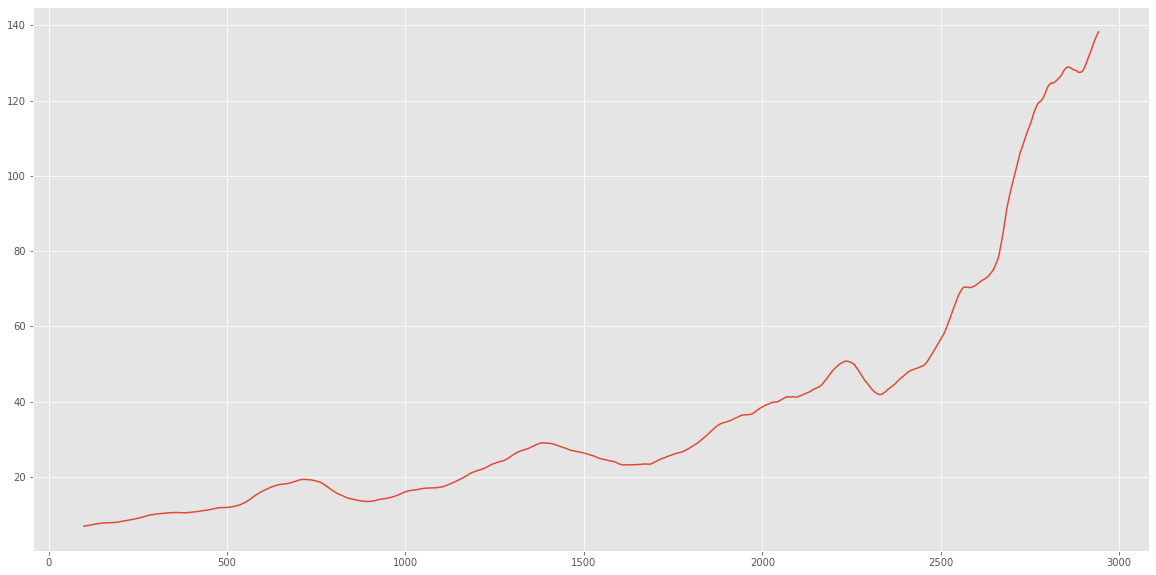

In [22]:
##Extra Libraries
import matplotlib as mpl
from matplotlib import style

## Test
## Plotting Moving Averages
mpl.rc('figure', figsize=(20,10))
style.use('ggplot')
data.loc[data['Name']=='AAPL']['Adj Close'].rolling(window = 100).mean().plot()

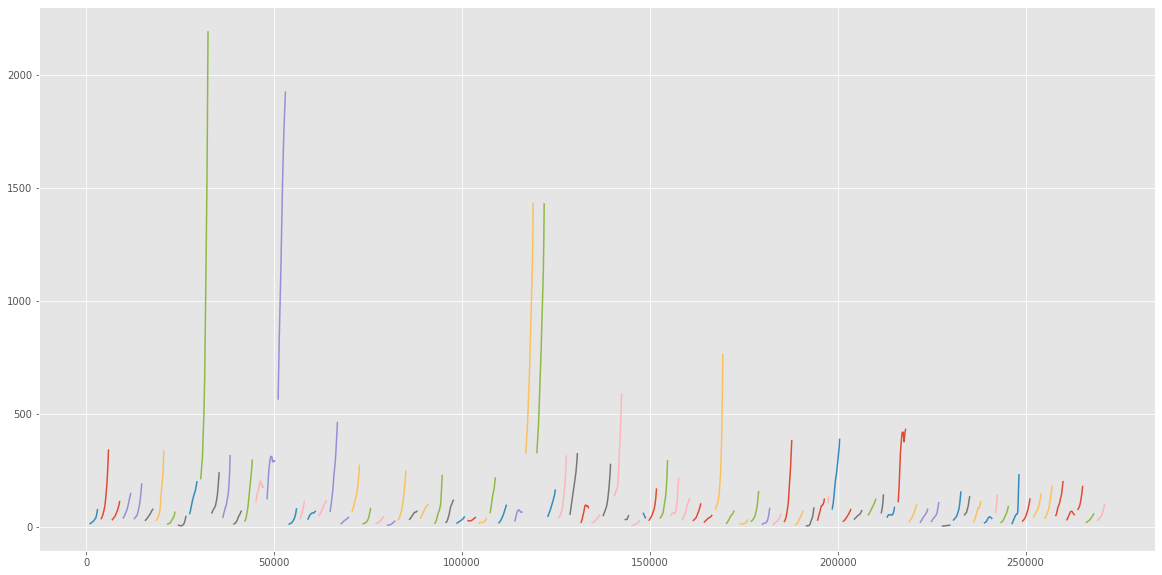

In [23]:
##Plot all companies
for company in companies:
    data.loc[data['Name']==company]['Adj Close'].rolling(window = 1000).mean().plot(label=company)

In [24]:
##Find Inersection of data on TIME
AAPL = data.loc[data['Name']=='AAPL'][['Date','Adj Close']]
AAPL['AAPL']= AAPL['Adj Close']
AAPL.drop('Adj Close', axis=1, inplace=True)
AAPL

,Date,AAPL
0,2010-01-04,6.562591
1,2010-01-05,6.573935
2,2010-01-06,6.469369
3,2010-01-07,6.457407
4,2010-01-08,6.500339
...,...,...
2938,2021-09-03,154.300003
2939,2021-09-07,156.690002
2940,2021-09-08,155.110001
2941,2021-09-09,154.070007


In [25]:
companies.remove('AAPL')
for company in companies:
    certain_company = data.loc[data['Name']==company][['Date','Adj Close']]
    certain_company[company] = certain_company['Adj Close']
    certain_company.drop('Adj Close', axis=1, inplace=True)
    AAPL = pd.merge(AAPL,certain_company,how='inner',on =['Date'])

stocks = AAPL.set_index('Date')  

stocks.describe()


,AAPL,REGN,QCOM,ADP,AMD,MRVL,CPRT,TEAM,ADI,TSLA,...,KHC,CMCSA,AEP,VRSN,MNST,MU,WBA,ORLY,CHTR,EA
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,...,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,104.206192,505.064029,111.111711,163.960698,69.779231,38.685496,104.771943,196.362217,129.310790,403.254817,...,32.086645,46.869594,83.670222,204.215668,78.129069,61.968745,45.559762,460.336418,587.128866,125.183868
std,29.573891,98.131710,29.412831,24.251637,21.903699,12.109005,20.872919,59.282830,24.168895,264.006193,...,5.486059,7.392327,5.619279,13.310710,13.866603,16.410093,6.668061,69.560793,98.545716,16.988896
min,53.821392,273.459991,59.000645,105.610352,28.230000,17.090620,58.779999,107.750000,79.982941,46.285999,...,18.766235,31.639080,66.502419,151.169998,50.970001,34.470001,32.216106,260.920013,371.700012,86.510880
25%,74.925135,461.554993,83.711798,143.203838,50.297499,26.250291,87.004999,148.049999,110.586912,146.551498,...,28.366783,42.062330,79.110979,194.527496,65.630001,47.912499,39.342136,422.467514,504.227493,109.322725
50%,114.289909,509.289993,113.565109,163.311577,77.895000,38.310633,104.049999,187.985001,118.432182,412.870010,...,31.025438,44.416824,84.125244,205.474998,81.144997,55.045000,46.765715,449.635010,607.600006,130.000145
75%,127.996466,580.995010,139.041832,182.606007,85.635000,47.716695,120.747499,231.539997,153.511841,659.090012,...,36.339769,53.959295,87.363169,213.412495,90.855000,78.434998,51.257817,484.212502,651.185013,140.710205
max,156.690002,680.960022,162.409454,215.737457,118.769997,63.240002,148.330002,384.589996,171.853897,883.090027,...,43.628361,61.750000,99.117104,233.529999,98.790001,95.589996,57.984570,620.919983,821.010010,148.432236


#### Plot intersected data

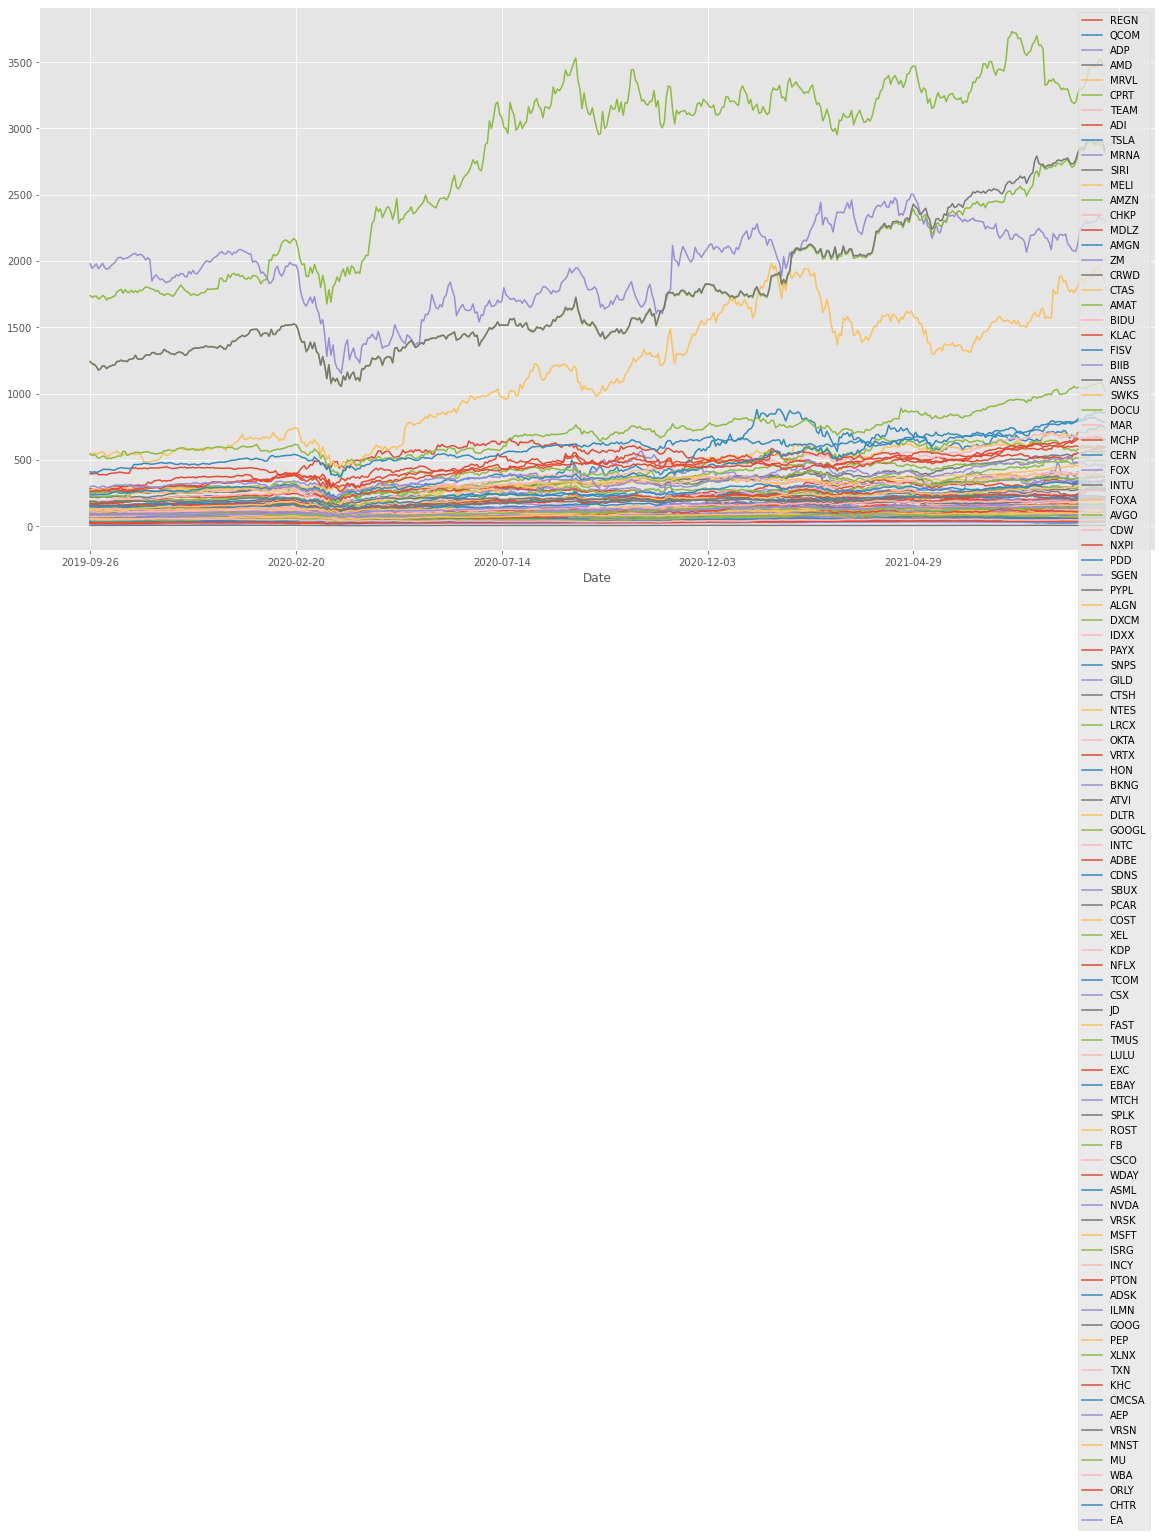

In [26]:
for company in companies:
    stocks[company].plot(label=company)
plt.legend()


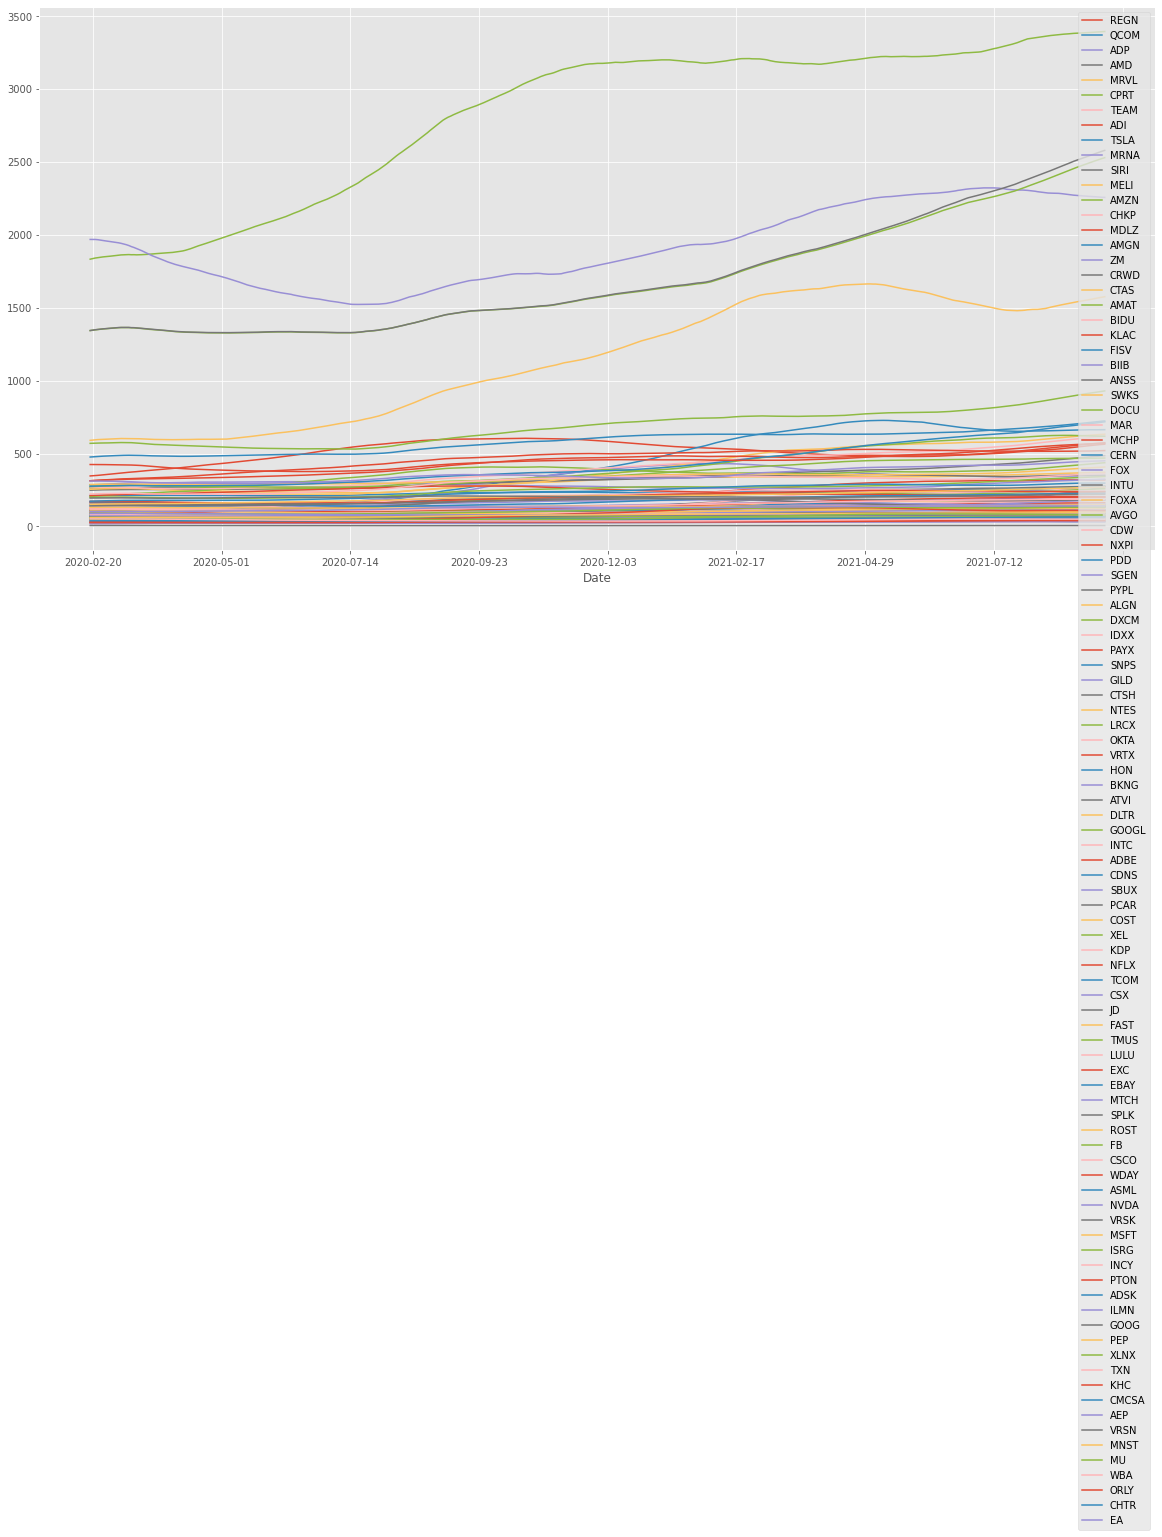

In [27]:
for company in companies:
    stocks[company].rolling(window = 100).mean().plot(label=company)
plt.legend()


## Correlation Heatmap 

In [28]:
##import additional library for Heatmap
import seaborn as sns
## Handling with data
data_pivot = data.pivot('Date','Name','Adj Close')

corr_data = data_pivot.corr(method='pearson')
corr_data.head().reset_index()
corr_data.index.name = None

corr_data

Name,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
AAPL,1.000000,0.973907,0.941884,0.885238,0.973308,0.823047,0.934063,0.941200,0.966460,0.862265,...,0.920714,0.949688,0.931962,0.877590,0.840704,0.129466,0.901926,0.897994,0.907073,0.878480
ADBE,0.973907,1.000000,0.969872,0.940051,0.989613,0.888171,0.947178,0.927780,0.945849,0.896898,...,0.835038,0.976643,0.966122,0.946516,0.893460,0.155794,0.948375,0.944936,0.950272,0.848737
ADI,0.941884,0.969872,1.000000,0.978351,0.977006,0.933441,0.950416,0.943226,0.879384,0.934092,...,0.801093,0.994029,0.966323,0.955502,0.896426,0.307718,0.950246,0.961780,0.971505,0.684420
ADP,0.885238,0.940051,0.978351,1.000000,0.939084,0.969979,0.914946,0.884730,0.811378,0.948840,...,0.694820,0.971730,0.962674,0.974261,0.909525,0.380911,0.940887,0.970547,0.960431,0.306750
ADSK,0.973308,0.989613,0.977006,0.939084,1.000000,0.883581,0.956336,0.940205,0.943953,0.892064,...,0.854255,0.979971,0.958604,0.937664,0.886681,0.164514,0.955807,0.939635,0.960085,0.843549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.129466,0.155794,0.307718,0.380911,0.164514,0.450082,0.199108,0.205005,-0.065014,0.507915,...,-0.002667,0.282334,0.266375,0.269940,0.353793,1.000000,-0.291420,0.333809,0.247223,-0.437163
WDAY,0.901926,0.948375,0.950246,0.940887,0.955807,0.882114,0.903222,0.858300,0.902450,0.881602,...,0.771043,0.944823,0.952420,0.939096,0.845849,-0.291420,1.000000,0.914610,0.968772,0.689317
XEL,0.897994,0.944936,0.961780,0.970547,0.939635,0.982061,0.869139,0.858060,0.837325,0.957540,...,0.694758,0.959583,0.977882,0.978065,0.935850,0.333809,0.914610,1.000000,0.944001,0.698047
XLNX,0.907073,0.950272,0.971505,0.960431,0.960085,0.917293,0.923445,0.885190,0.870500,0.891422,...,0.767013,0.962049,0.957622,0.954866,0.870160,0.247223,0.968772,0.944001,1.000000,0.657727


<Figure size 1440x720 with 0 Axes>

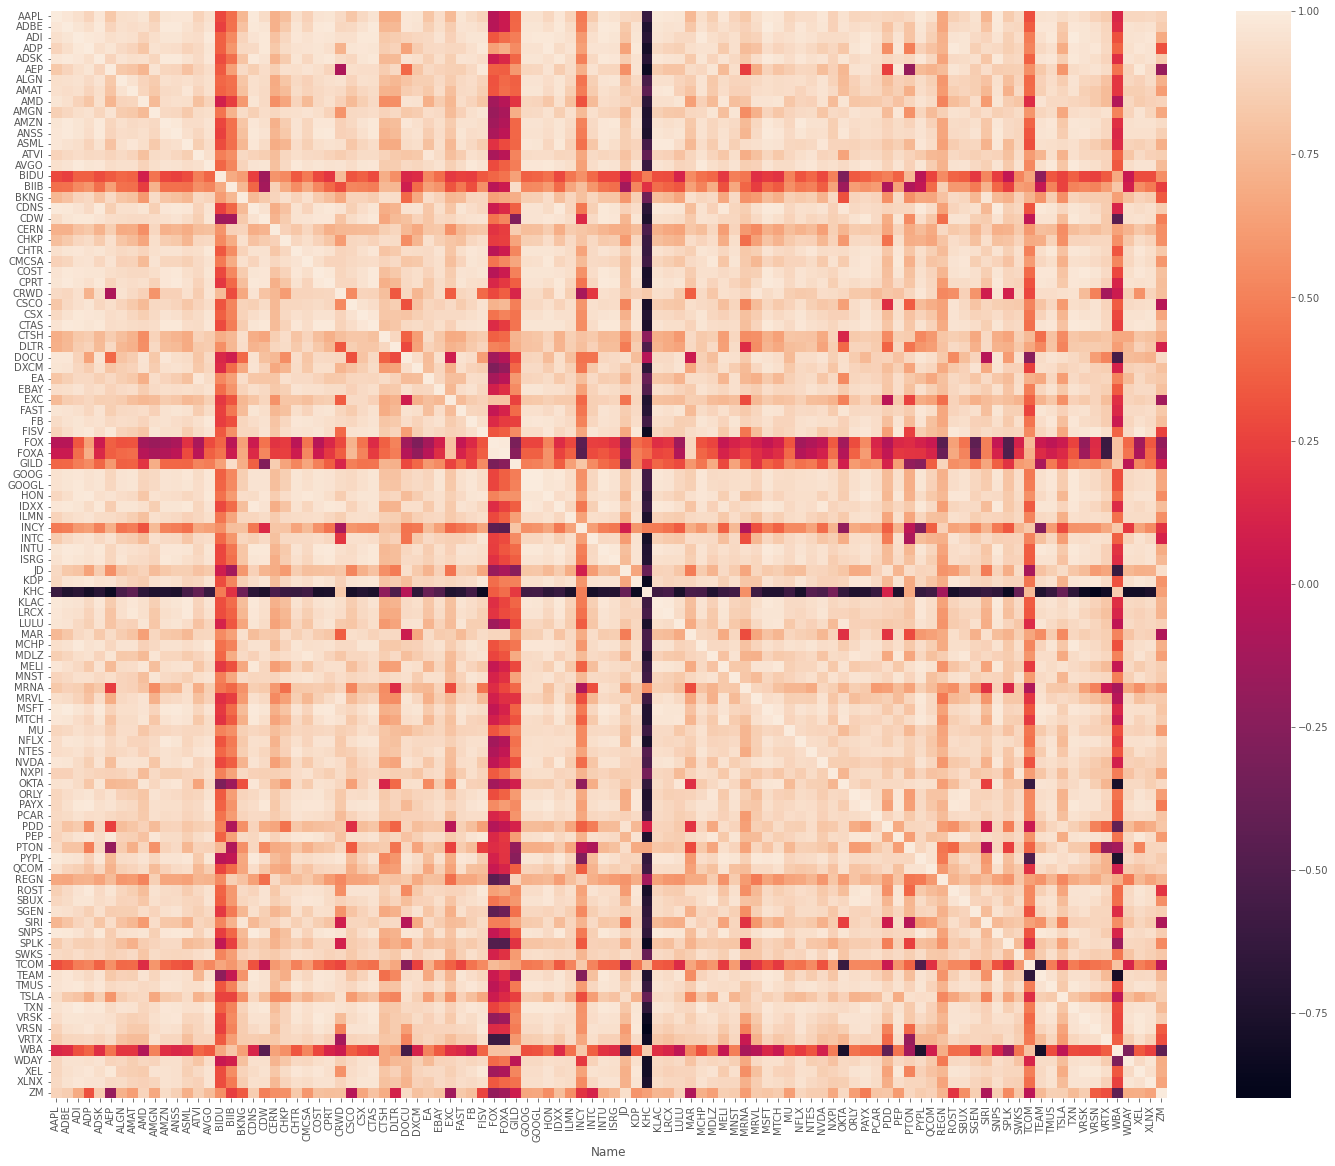

<Figure size 1440x720 with 0 Axes>

In [29]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr_data)
plt.figure()

## Machine learning

#### Manifold learning - Distributed Stochastic Neighbor Embedding



In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL
...,...,...,...,...,...,...,...,...
271675,2021-09-03,295.325012,301.804993,292.029999,298.290009,298.290009,6127900,ZM
271676,2021-09-07,298.295013,300.980011,294.799988,299.959991,299.959991,4251900,ZM
271677,2021-09-08,299.549988,299.959991,290.529999,293.600006,293.600006,3934400,ZM
271678,2021-09-09,292.160004,297.570007,291.130005,295.859985,295.859985,3350100,ZM


In [6]:
##import extra libraries
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

In [7]:
## Make data ready that we will analyze
data['diff'] = data['Close']-data['Open']
pivot_with_diff = data.pivot('Date','Name','diff')


"""Dt.index.name = None
"""
##BECAUSE OF ERROR
Dt = pivot_with_diff.T
Dt = Dt.fillna(0)
Dt

Date,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2021-08-27,2021-08-30,2021-08-31,2021-09-01,2021-09-02,2021-09-03,2021-09-07,2021-09-08,2021-09-09,2021-09-10
Name,,,,,,,,,,,,,,,,,,,,,
AAPL,0.020714,-0.007857,-0.121786,-0.041786,0.060000,-0.096071,-0.052500,0.099285,-0.024286,-0.178571,...,1.120010,4.119995,-0.830002,-0.320007,-0.220001,0.540009,1.720001,-1.869995,-1.419998,-6.029999
ADBE,0.439999,0.660000,0.289997,-0.520000,-0.060001,-0.470001,-0.480000,0.449997,-0.230000,-0.049999,...,6.000000,6.209961,-4.200012,1.380005,-5.179993,2.160034,-5.959961,3.069946,-3.160034,-7.239990
ADI,-0.120001,-0.049999,-0.150000,-0.150000,0.289999,-0.270000,-0.539999,-0.200001,-0.030001,-0.890001,...,-0.820007,0.009995,-3.199997,-2.660004,0.489990,-0.080002,0.610001,-0.040009,5.539993,0.339996
ADP,-0.623352,-0.043896,-0.263386,0.307289,0.000000,0.166813,-0.043896,0.342407,0.184372,-0.395084,...,1.350006,-0.019989,-0.840012,-0.639999,1.039993,2.880005,-4.630005,2.460007,-1.599991,-3.569992
ADSK,0.059999,-0.340000,0.190001,0.260000,0.860001,-0.090000,-0.280001,0.200001,0.320000,-0.139999,...,1.410004,-3.549988,-3.040009,-8.559998,-19.029999,2.049988,-3.300018,3.109985,-2.130005,-4.230011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.290001,-0.099998,0.560001,0.250000,0.070004,0.049999,-0.099998,0.430000,-0.049999,-0.330002,...,0.380001,0.049999,2.290001,-0.439999,1.279999,-0.250000,-0.110001,-0.160000,-0.340000,-1.360001
WDAY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.250000,0.489990,1.860016,-0.630005,-1.459991,6.819977,-2.160004,-2.940002,-1.730011,-3.790009
XEL,-0.299999,-0.120001,0.000000,-0.019999,0.030001,0.080000,0.299999,0.289999,-0.039999,-0.130001,...,-0.440002,0.500000,-0.309998,0.730003,0.510002,-0.309998,-1.489998,1.549995,0.219994,-1.470001


In [8]:
## Inputs for model
companies = Dt.index
behaviours = Dt.values

In [9]:
## Turn values into their equivalent | Normalizing
normalized_behaviours = normalize(behaviours)
normalized_behaviours

array([[ 0.00049201, -0.00018663, -0.00289266, ..., -0.04441622,
        -0.03372787, -0.14322483],
       [ 0.00237877,  0.00356817,  0.00156782, ...,  0.01659711,
        -0.01708416, -0.03914171],
       [-0.00185496, -0.00077288, -0.00231868, ..., -0.00061845,
         0.08563678,  0.00525564],
       ...,
       [-0.01021814, -0.00408729,  0.        , ...,  0.0527937 ,
         0.0074931 , -0.05006905],
       [ 0.00058837, -0.00397158, -0.00161806, ..., -0.01117939,
         0.0120617 ,  0.00308888],
       [ 0.        ,  0.        ,  0.        , ..., -0.02652532,
         0.01649471,  0.02046244]])

In [10]:
# MODEL

model = TSNE(learning_rate = 100)
tsne_features = model.fit_transform(normalized_behaviours)
xs = tsne_features[:,0]
ys = tsne_features[:,1]

C:\Users\Ilkin\AppData\Roaming\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


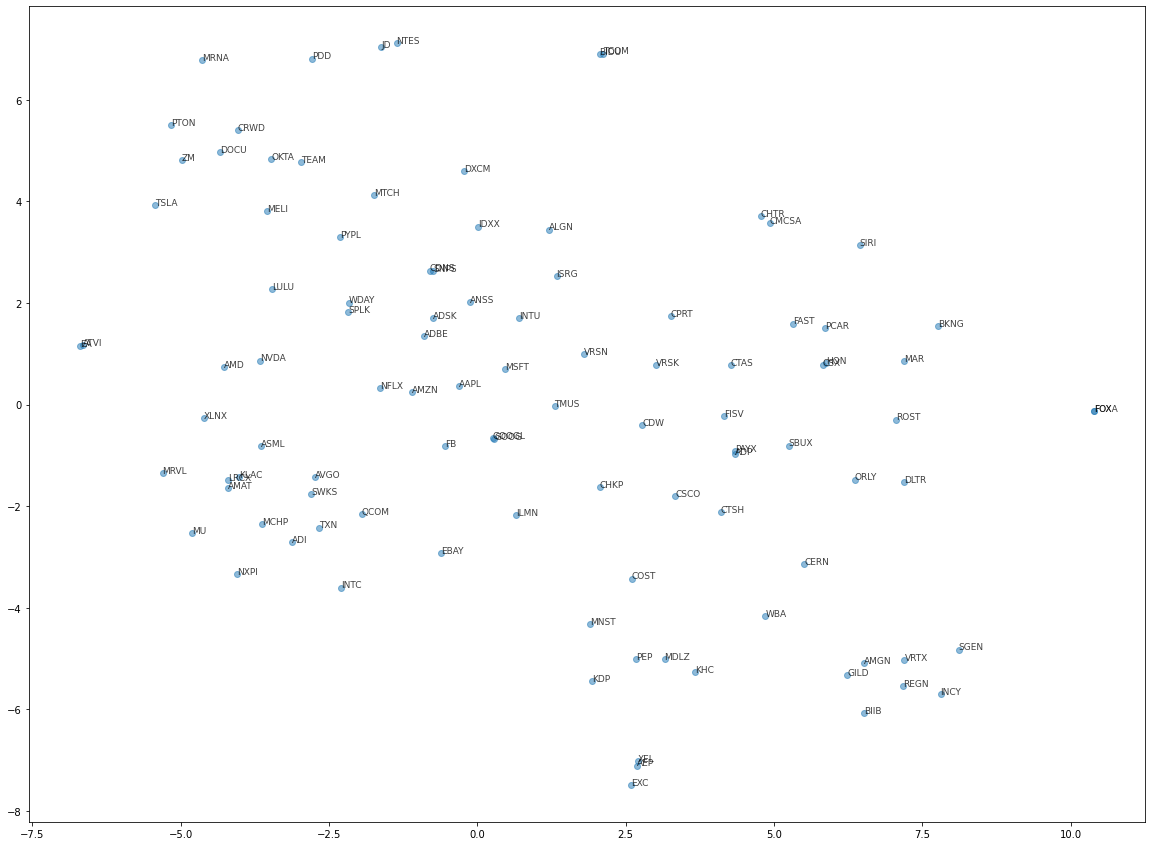

<Figure size 432x288 with 0 Axes>

In [13]:
##Ploting

fig, ax = plt.subplots(figsize = [20, 15])
plt.scatter(xs, ys, alpha = 0.5)
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=9, alpha=0.75)
plt.tight_layout
plt.show()
plt.savefig('myfig')

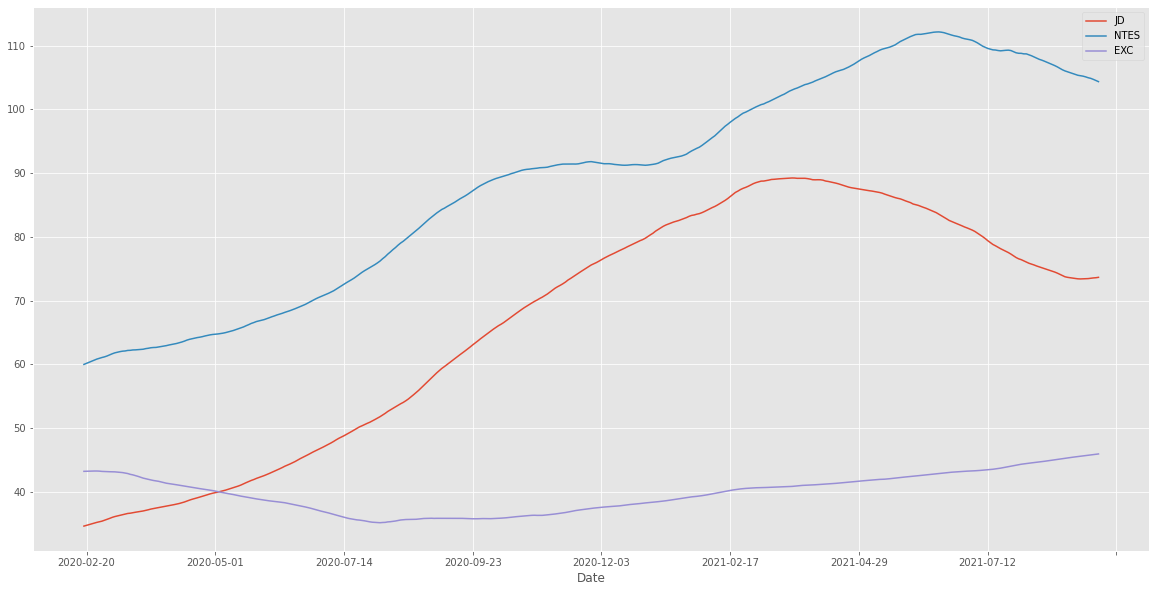

In [46]:
stocks['JD'].rolling(window = 100).mean().plot(label='JD')
stocks['NTES'].rolling(window = 100).mean().plot(label='NTES')
stocks['EXC'].rolling(window = 100).mean().plot(label='EXC')
plt.legend()




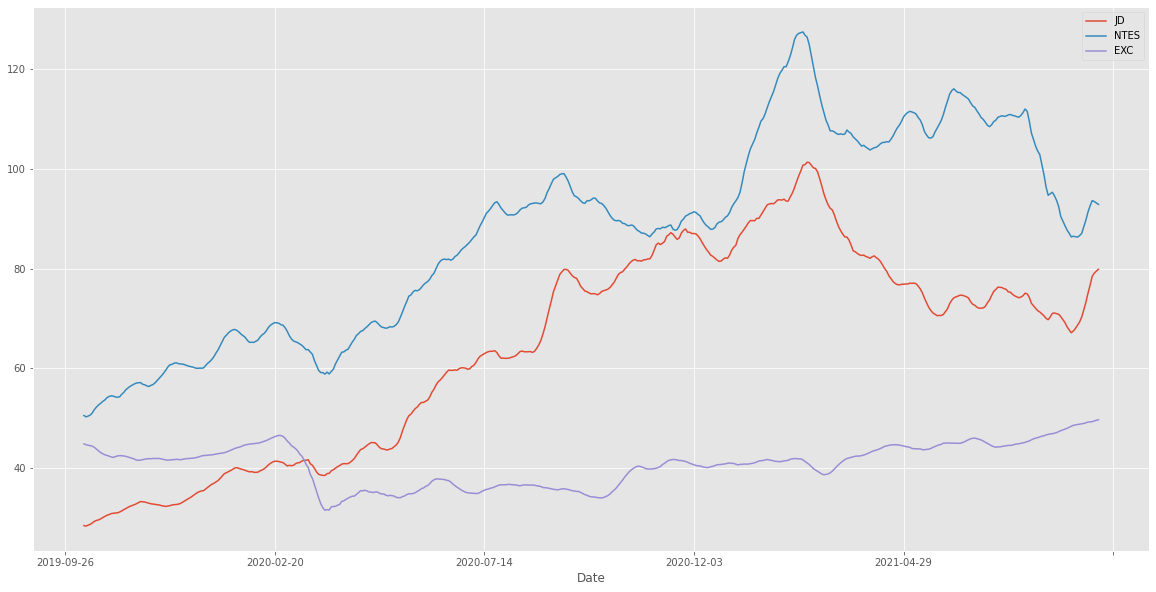

In [49]:
stocks['JD'].rolling(window = 10).mean().plot(label='JD')
stocks['NTES'].rolling(window = 10).mean().plot(label='NTES')
stocks['EXC'].rolling(window = 10).mean().plot(label='EXC')
plt.legend()
